In [1]:
import pandas as pd
import numpy as np

In [2]:
loc= 'C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Costco\\Dataset\\'


data= pd.read_excel(loc + 'combine_data_clean20-22.xlsx', index_col=False)
data.head()

,Date,Country,State,Region,District,Location,Major Department,Department,Category,Group,Item Category,Item,Quantity,Amount
0,2020-01-02,US,CA,LA REGION,LA3,LAKEWOOD,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,640 CONVENTIONAL CHICKEN,DRUMSTICKS NNNN,172.55461,205.34
1,2020-01-02,US,CA,LA REGION,LA3,LAKEWOOD,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,645 CHICKEN XXXXX - O,CHICKEN XXXXX - O,45.85170,228.80
2,2020-01-02,US,CA,BAY AREA,BA3,HAYWARD,FRESH FOOD,61 MEAT,6 MEAT,68 SEAFOOD,680 FRESH FISH FILLETS,FILLET QQQQ,60.41915,422.33
3,2020-01-02,US,CA,LA REGION,LA3,LAKEWOOD,FRESH FOOD,61 MEAT,6 MEAT,68 SEAFOOD,680 FRESH FISH FILLETS,FILLET QQQQ,36.49069,255.07
4,2020-01-02,US,CA,BAY AREA,BA3,HAYWARD,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,645 CHICKEN XXXXX - O,CHICKEN XXXXX - O,90.86774,453.43


In [3]:
import copy
data_df= copy.deepcopy(data)

In [4]:
data_df.head()

,Date,Country,State,Region,District,Location,Major Department,Department,Category,Group,Item Category,Item,Quantity,Amount
0,2020-01-02,US,CA,LA REGION,LA3,LAKEWOOD,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,640 CONVENTIONAL CHICKEN,DRUMSTICKS NNNN,172.55461,205.34
1,2020-01-02,US,CA,LA REGION,LA3,LAKEWOOD,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,645 CHICKEN XXXXX - O,CHICKEN XXXXX - O,45.85170,228.80
2,2020-01-02,US,CA,BAY AREA,BA3,HAYWARD,FRESH FOOD,61 MEAT,6 MEAT,68 SEAFOOD,680 FRESH FISH FILLETS,FILLET QQQQ,60.41915,422.33
3,2020-01-02,US,CA,LA REGION,LA3,LAKEWOOD,FRESH FOOD,61 MEAT,6 MEAT,68 SEAFOOD,680 FRESH FISH FILLETS,FILLET QQQQ,36.49069,255.07
4,2020-01-02,US,CA,BAY AREA,BA3,HAYWARD,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,645 CHICKEN XXXXX - O,CHICKEN XXXXX - O,90.86774,453.43


In [5]:
data_df= data_df[['Date', 'Location', 'Item', 'Quantity', 'Amount']]

In [6]:
from statsmodels.tsa.stattools import adfuller

# The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

# The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.


In [7]:
X= data_df['Quantity'].values

In [8]:
len(X)


12456

In [9]:
from numpy import log
X= log(X)

In [10]:
adfuller_result = adfuller(X, autolag='AIC')
adfuller_result
# print('ADF Statistic: %f' % adfuller_result[0])
# print('p-value: %f' % adfuller_result[1])
# for key, value in adfuller_result[4].items():
#     print('\t%s: %.3f' % (key, value))

(-16.302146177735324,
 3.258236866674152e-29,
 30,
 12425,
 {'1%': -3.4308764105835365,
  '5%': -2.8617726471649054,
  '10%': -2.5668938330846243},
 41163.09405515514)

In [11]:
# print('ADF Statistic: %f' % adfuller_result[0])
print('p-value: %f' % adfuller_result[1])


p-value: 0.000000


In [12]:
# ADF Test - nul hypothesis - non-stationary - if p-value < 5% reject null hypothesis
adfuller_result = adfuller(data_df['Quantity'], autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -15.175406772182392
p-value: 6.305118093392754e-28
Critial Values:
   1%, -3.43087628348681
Critial Values:
   5%, -2.8617725909994824
Critial Values:
   10%, -2.5668938031881146


In [33]:
# Data is stationary. 

## Weekly

In [14]:
loc= 'C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Costco\\Dataset\\Final Output\\Weekly\\'


data_wk = pd.read_excel(loc + 'Data_Weekly.xlsx', index_col=False)
data_wk.head()

,Location,Item,Date,Quantity,Amount
0,FREMONT,CHICKEN XXXXX - O,2020-01-05,37.023380,184.746667
1,FREMONT,CHICKEN XXXXX - O,2020-01-12,41.889780,209.030000
2,FREMONT,CHICKEN XXXXX - O,2020-01-19,86.101210,429.645000
3,FREMONT,CHICKEN XXXXX - O,2020-01-26,63.834068,318.532000
4,FREMONT,CHICKEN XXXXX - O,2020-02-02,45.320977,226.151667


In [82]:
import copy

data_df= copy.deepcopy(data_wk)


In [83]:
data_df

,Location,Item,Date,Quantity,Amount
0,FREMONT,CHICKEN XXXXX - O,2020-01-05,37.023380,184.746667
1,FREMONT,CHICKEN XXXXX - O,2020-01-12,41.889780,209.030000
2,FREMONT,CHICKEN XXXXX - O,2020-01-19,86.101210,429.645000
3,FREMONT,CHICKEN XXXXX - O,2020-01-26,63.834068,318.532000
4,FREMONT,CHICKEN XXXXX - O,2020-02-02,45.320977,226.151667
...,...,...,...,...,...
2122,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,2022-10-30,113.512925,146.431667
2123,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,2022-11-06,97.404393,125.651667
2124,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,2022-11-13,93.240305,120.280000
2125,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,2022-11-20,94.381132,121.751667


In [105]:
data_df1= data_df[(data_df['Location'] == 'FREMONT') &  (data_df['Item']=='CHICKEN XXXXX - O')]

In [106]:
data_df1= data_df1.set_index('Date')

In [107]:
data_df1

,Location,Item,Quantity,Amount
Date,,,,
2020-01-05,FREMONT,CHICKEN XXXXX - O,37.023380,184.746667
2020-01-12,FREMONT,CHICKEN XXXXX - O,41.889780,209.030000
2020-01-19,FREMONT,CHICKEN XXXXX - O,86.101210,429.645000
2020-01-26,FREMONT,CHICKEN XXXXX - O,63.834068,318.532000
2020-02-02,FREMONT,CHICKEN XXXXX - O,45.320977,226.151667
...,...,...,...,...
2022-10-30,FREMONT,CHICKEN XXXXX - O,38.625329,231.365714
2022-11-06,FREMONT,CHICKEN XXXXX - O,52.301170,313.284000
2022-11-13,FREMONT,CHICKEN XXXXX - O,41.523016,248.722857


In [109]:
import datetime

# data_df2 = data_df1['Quantity'].to_frame()
data_df2['Mv_Qty'] = data_df1['Quantity'].rolling(window =3).mean()

In [113]:
# data_df3 = data_df1['Amount'].to_frame()
data_df2['Mv_Amt'] = data_df1['Amount'].rolling(window =3).mean()

In [114]:
data_df2

,Quantity,Mv_Qty,Mv_Amt
Date,,,
2020-01-05,37.023380,NaN,NaN
2020-01-12,41.889780,NaN,NaN
2020-01-19,86.101210,55.004790,274.473889
2020-01-26,63.834068,63.941686,319.069000
2020-02-02,45.320977,65.085418,324.776222
...,...,...,...
2022-10-30,38.625329,47.729914,285.902183
2022-11-06,52.301170,51.649819,309.382405
2022-11-13,41.523016,44.149838,264.457524


In [112]:
data_df3

,Amount,Mv_Amt
Date,,
2020-01-05,184.746667,NaN
2020-01-12,209.030000,NaN
2020-01-19,429.645000,274.473889
2020-01-26,318.532000,319.069000
2020-02-02,226.151667,324.776222
...,...,...
2022-10-30,231.365714,285.902183
2022-11-06,313.284000,309.382405
2022-11-13,248.722857,264.457524


In [115]:
data_df2.dropna(inplace=True)

In [116]:
data_df2

,Quantity,Mv_Qty,Mv_Amt
Date,,,
2020-01-19,86.101210,55.004790,274.473889
2020-01-26,63.834068,63.941686,319.069000
2020-02-02,45.320977,65.085418,324.776222
2020-02-09,44.333068,51.162704,255.301889
2020-02-16,48.167670,45.940572,229.243444
...,...,...,...
2022-10-30,38.625329,47.729914,285.902183
2022-11-06,52.301170,51.649819,309.382405
2022-11-13,41.523016,44.149838,264.457524


<AxesSubplot:xlabel='Date'>

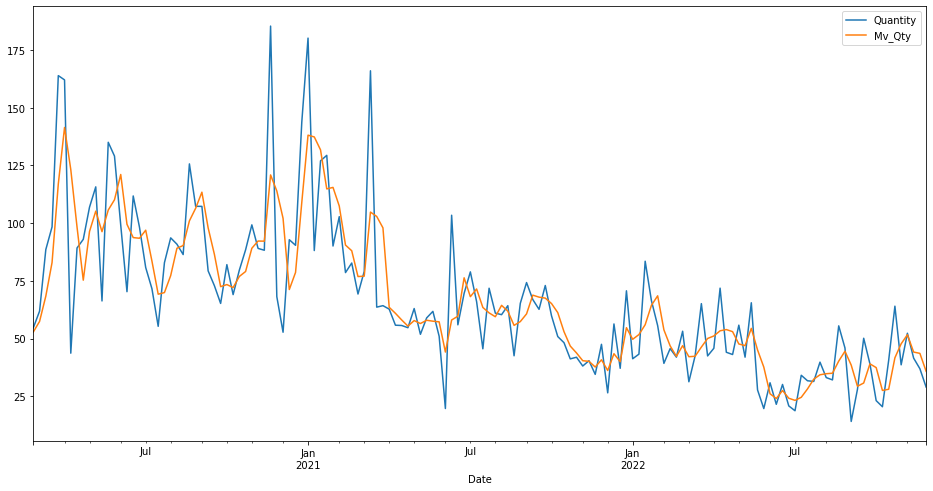

In [54]:
# moving average of 30 days using .plot() method
data_df2[['Quantity', 'Mv_Qty']].plot(label='Quantity',figsize=(16, 8))

### All in One

In [55]:
data_df['Location'].unique()

array(['FREMONT', 'HAYWARD', 'LAKEWOOD', 'RICHMOND CA',
       'S SAN FRANCISCO BUS CTR'], dtype=object)

In [56]:
data_df['Item'].unique()

array(['CHICKEN XXXXX - O', 'DRUMSTICKS NNNN', 'FILLET QQQQ',
       'BEEF OOOO - GT'], dtype=object)

In [58]:
data_df

,Location,Item,Date,Quantity,Amount
0,FREMONT,CHICKEN XXXXX - O,2020-01-05,37.023380,184.746667
1,FREMONT,CHICKEN XXXXX - O,2020-01-12,41.889780,209.030000
2,FREMONT,CHICKEN XXXXX - O,2020-01-19,86.101210,429.645000
3,FREMONT,CHICKEN XXXXX - O,2020-01-26,63.834068,318.532000
4,FREMONT,CHICKEN XXXXX - O,2020-02-02,45.320977,226.151667
...,...,...,...,...,...
2122,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,2022-10-30,113.512925,146.431667
2123,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,2022-11-06,97.404393,125.651667
2124,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,2022-11-13,93.240305,120.280000
2125,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,2022-11-20,94.381132,121.751667


In [118]:
for i in data_df['Location'].unique():
    df= data_df[data_df['Location']==i]
    for j in df['Item'].unique():
        item_data= df[df["Item"]==j]
        
        item_data= item_data.drop(['Location', 'Item'], axis=1)
#         train_dates = pd.to_datetime(item_data['Date']) 
        item_data.set_index('Date')
#         print(item_data)
#         time_series = item_data.index  #Get dates for test data
        
     
        item_data['Mv_Qty'] = item_data['Quantity'].rolling(window =3).mean()
        item_data['Mv_Amt'] = item_data['Amount'].rolling(window =3).mean()
        item_data.dropna(inplace=True)
        
        #Saving Results 
        item_data['Location']= i
        item_data['Item']=j
        
        predction_output = "ModelOut\Moving_avg\MV_" +i+"-"+j+".xlsx"
        item_data.to_excel(predction_output, index= False)
   

In [119]:
import pandas as pd
import os
import glob

In [120]:
path = 'C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Costco\\Code\\ModelOut\\Moving_avg\\'
out_files = glob.glob(os.path.join(path, "*.xlsx"))

dfs= []


for f in out_files:
    dfs.append(pd.read_excel(f))
df_mv=pd.concat(dfs, ignore_index=True)


In [121]:
df_mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099 entries, 0 to 2098
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2099 non-null   datetime64[ns]
 1   Quantity  2099 non-null   float64       
 2   Amount    2099 non-null   float64       
 3   Mv_Qty    2099 non-null   float64       
 4   Mv_Amt    2099 non-null   float64       
 5   Location  2099 non-null   object        
 6   Item      2099 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 114.9+ KB


In [123]:
# df_mv.to_excel('Data_Moving_avg.xlsx', index=False)